In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from youtube_transcript_api import YouTubeTranscriptApi

pretext=YouTubeTranscriptApi.get_transcript('6Af6b_wyiwI')


In [3]:
pretext

[{'text': 'When I was a kid,', 'start': 17.504, 'duration': 1.894},
 {'text': 'the disaster we worried about most \nwas a nuclear war.',
  'start': 19.398,
  'duration': 3.561},
 {'text': "That's why we had a barrel like this\ndown in our basement,",
  'start': 23.819,
  'duration': 3.266},
 {'text': 'filled with cans of food and water.',
  'start': 27.085,
  'duration': 2.571},
 {'text': 'When the nuclear attack came,', 'start': 30.256, 'duration': 1.645},
 {'text': 'we were supposed to go downstairs,\nhunker down, and eat out of that barrel.',
  'start': 31.901,
  'duration': 4.736},
 {'text': 'Today the greatest risk \nof global catastrophe',
  'start': 37.877,
  'duration': 3.72},
 {'text': "doesn't look like this.", 'start': 41.597, 'duration': 2.86},
 {'text': 'Instead, it looks like this.', 'start': 44.457, 'duration': 2.781},
 {'text': 'If anything kills over 10 million people\nin the next few decades,',
  'start': 48.438,
  'duration': 5.491},
 {'text': "it's most likely to be

In [4]:
text=""
for i in pretext:
  s=i["text"]
  text=text+s+" "
print(text)

When I was a kid, the disaster we worried about most 
was a nuclear war. That's why we had a barrel like this
down in our basement, filled with cans of food and water. When the nuclear attack came, we were supposed to go downstairs,
hunker down, and eat out of that barrel. Today the greatest risk 
of global catastrophe doesn't look like this. Instead, it looks like this. If anything kills over 10 million people
in the next few decades, it's most likely to be 
a highly infectious virus rather than a war. Not missiles, but microbes. Now, part of the reason for this is that we've invested a huge amount
in nuclear deterrents. But we've actually invested very little 
in a system to stop an epidemic. We're not ready for the next epidemic. Let's look at Ebola. I'm sure all of you read about it 
in the newspaper, lots of tough challenges. I followed it carefully 
through the case analysis tools we use to track polio eradication. And as you look at what went on, the problem wasn't that there wa

# **SpaCy summarization**

In [5]:
import spacy
nlp = spacy.load('en_core_web_sm')
doc = nlp(text)

In [6]:
from spacy.lang.en.stop_words import STOP_WORDS
stopwords = list(STOP_WORDS)


In [7]:
from string import punctuation
punctuation = punctuation + '\n'

In [8]:
word_frequencies = {}
for word in doc:
  if word.text.lower() not in stopwords:
    if word.text.lower() not in punctuation:
      if word.text not in word_frequencies.keys():
        word_frequencies[word.text] = 1
      else:
        word_frequencies[word.text] += 1

In [9]:
for word in word_frequencies.keys():
  word_frequencies[word] = word_frequencies[word]/max(word_frequencies.values())
word_frequencies

{'kid': 0.07692307692307693,
 'disaster': 0.07692307692307693,
 'worried': 0.07692307692307693,
 'nuclear': 0.23076923076923078,
 'war': 0.38461538461538464,
 'barrel': 0.15384615384615385,
 'like': 0.46153846153846156,
 'basement': 0.15384615384615385,
 'filled': 0.07692307692307693,
 'cans': 0.15384615384615385,
 'food': 0.07692307692307693,
 'water': 0.07692307692307693,
 'attack': 0.07692307692307693,
 'came': 0.15384615384615385,
 'supposed': 0.07692307692307693,
 'downstairs': 0.07692307692307693,
 'hunker': 0.07692307692307693,
 'eat': 0.07692307692307693,
 'Today': 0.07692307692307693,
 'greatest': 0.07692307692307693,
 'risk': 0.07692307692307693,
 'global': 0.38461538461538464,
 'catastrophe': 0.07692307692307693,
 'look': 0.6153846153846154,
 'Instead': 0.07692307692307693,
 'looks': 0.07692307692307693,
 'kills': 0.07692307692307693,
 '10': 0.07692307692307693,
 'million': 0.15384615384615385,
 'people': 1.0,
 'decades': 0.09090909090909091,
 'likely': 0.09090909090909091,


In [10]:
sentence_tokens = [sent for sent in doc.sents]
sentence_tokens

[When I was a kid, the disaster we worried about most 
 was a nuclear war., That's why we had a barrel like this
 down in our basement, filled with cans of food and water., When the nuclear attack came, we were supposed to go downstairs,
 hunker down, and eat out of that barrel., Today the greatest risk 
 of global catastrophe doesn't look like this., Instead, it looks like this., If anything kills over 10 million people
 in the next few decades, it's most likely to be 
 a highly infectious virus rather than a war., Not missiles, but microbes., Now, part of the reason for this is that we've invested a huge amount
 in nuclear deterrents., But we've actually invested very little 
 in a system to stop an epidemic., We're not ready for the next epidemic., Let's look at Ebola., I'm sure all of you read about it 
 in the newspaper, lots of tough challenges., I followed it carefully 
 through the case analysis tools we use to track polio eradication., And as you look at what went on, the prob

In [11]:
sentence_scores = {}
for sent in sentence_tokens:
  for word in sent:
    if word.text.lower() in word_frequencies.keys():
      if sent not in sentence_scores.keys():
        sentence_scores[sent] = word_frequencies[word.text.lower()]
      else:
        sentence_scores[sent] += word_frequencies[word.text.lower()]
sentence_scores

{When I was a kid, the disaster we worried about most 
 was a nuclear war.: 0.8461538461538463, That's why we had a barrel like this
 down in our basement, filled with cans of food and water.: 1.1538461538461537, When the nuclear attack came, we were supposed to go downstairs,
 hunker down, and eat out of that barrel.: 0.923076923076923, Today the greatest risk 
 of global catastrophe doesn't look like this.: 1.6923076923076925, Instead, it looks like this.: 0.5384615384615385, If anything kills over 10 million people
 in the next few decades, it's most likely to be 
 a highly infectious virus rather than a war.: 2.692307692307692, Not missiles, but microbes.: 0.18181818181818182, Now, part of the reason for this is that we've invested a huge amount
 in nuclear deterrents.: 0.6853146853146853, But we've actually invested very little 
 in a system to stop an epidemic.: 1.9090909090909092, We're not ready for the next epidemic.: 1.9, Let's look at Ebola.: 0.7153846153846154, I'm sure all

In [12]:
from heapq import nlargest
select_length = int(len(sentence_tokens)*0.05)
summary = nlargest(select_length, sentence_scores, key = sentence_scores.get)
print(summary)

[In fact, if there's one positive thing
that can come out of the Ebola epidemic, it's that it can serve as an early 
warning, a wake-up call, to get ready., The World Bank estimates that 
if we have a worldwide flu epidemic, global wealth will go down
by over three trillion dollars and we'd have millions
and millions of deaths., The primary healthcare, the R&D, those things would reduce 
global health equity and make the world more just 
as well as more safe., We need a medical reserve corps: lots of people who've got 
the training and background who are ready to go, with the expertise.]


In [13]:
final_summary = [word.text for word in summary]
print(final_summary)

["In fact, if there's one positive thing\nthat can come out of the Ebola epidemic, it's that it can serve as an early \nwarning, a wake-up call, to get ready.", "The World Bank estimates that \nif we have a worldwide flu epidemic, global wealth will go down\nby over three trillion dollars and we'd have millions\nand millions of deaths.", 'The primary healthcare, the R&D, those things would reduce \nglobal health equity and make the world more just \nas well as more safe.', "We need a medical reserve corps: lots of people who've got \nthe training and background who are ready to go, with the expertise."]


In [14]:
summary = ' '.join(final_summary)
print(summary)

In fact, if there's one positive thing
that can come out of the Ebola epidemic, it's that it can serve as an early 
warning, a wake-up call, to get ready. The World Bank estimates that 
if we have a worldwide flu epidemic, global wealth will go down
by over three trillion dollars and we'd have millions
and millions of deaths. The primary healthcare, the R&D, those things would reduce 
global health equity and make the world more just 
as well as more safe. We need a medical reserve corps: lots of people who've got 
the training and background who are ready to go, with the expertise.


# **BERT**

In [15]:
from summarizer import Summarizer

In [16]:
model = Summarizer()
bertresult = model(text, num_sentences=5, min_length=60) #model(text, ratio=0.5)

Some weights of the model checkpoint at bert-large-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [17]:
print(bertresult)

When I was a kid, the disaster we worried about most 
was a nuclear war. But we've actually invested very little 
in a system to stop an epidemic. We've got cell phones to get information from the public 
and get information out to them. Now I don't have an exact budget
for what this would cost, but I'm quite sure it's very modest
compared to the potential harm. In fact, if there's one positive thing
that can come out of the Ebola epidemic, it's that it can serve as an early 
warning, a wake-up call, to get ready.


# **Summarization with custom dataset**

In [18]:
import numpy as np 
import pandas as pd 

In [68]:
trainning_df = pd.read_csv('cnn_dailymail/test.csv')

In [20]:
trainning_df.head()

,id,article,highlights
0,92c514c913c0bdfe25341af9fd72b29db544099b,Ever noticed how plane seats appear to be gett...,Experts question if packed out planes are put...
1,2003841c7dc0e7c5b1a248f9cd536d727f27a45a,A drunk teenage boy had to be rescued by secur...,Drunk teenage boy climbed into lion enclosure ...
2,91b7d2311527f5c2b63a65ca98d21d9c92485149,Dougie Freedman is on the verge of agreeing a ...,Nottingham Forest are close to extending Dougi...
3,caabf9cbdf96eb1410295a673e953d304391bfbb,Liverpool target Neto is also wanted by PSG an...,Fiorentina goalkeeper Neto has been linked wit...
4,3da746a7d9afcaa659088c8366ef6347fe6b53ea,Bruce Jenner will break his silence in a two-h...,"Tell-all interview with the reality TV star, 6..."


In [21]:
MAX_LEN = 32
SUMMARY_LEN = 3
TRAINNING_SIZE = 50

In [22]:
trainning_df = trainning_df.iloc[0:TRAINNING_SIZE,:].copy()

trainning_article_ls = list(trainning_df['article'])
trainning_highlight_ls = list(trainning_df['highlights'])

del trainning_df

In [23]:
df = pd.DataFrame(columns=['target_text','source_text'])
df['target_text'] = trainning_highlight_ls
df['source_text'] = ['summarize: '+item for item in trainning_article_ls]

In [24]:
df.head()

,target_text,source_text
0,Experts question if packed out planes are put...,summarize: Ever noticed how plane seats appear...
1,Drunk teenage boy climbed into lion enclosure ...,summarize: A drunk teenage boy had to be rescu...
2,Nottingham Forest are close to extending Dougi...,summarize: Dougie Freedman is on the verge of ...
3,Fiorentina goalkeeper Neto has been linked wit...,summarize: Liverpool target Neto is also wante...
4,"Tell-all interview with the reality TV star, 6...",summarize: Bruce Jenner will break his silence...


# BERT

In [25]:
from simplet5 import SimpleT5

model = SimpleT5()
model.from_pretrained(model_type="t5", model_name="t5-base")

Global seed set to 42


In [26]:
MAX_EPOCHS = 5

In [27]:
model.train(train_df=df[0:(int)(0.7*TRAINNING_SIZE)],
            eval_df=df[(int)(0.7*TRAINNING_SIZE):TRAINNING_SIZE], 
            source_max_token_len=MAX_LEN, 
            target_max_token_len=SUMMARY_LEN, 
            batch_size=32, max_epochs=MAX_EPOCHS, use_gpu=False)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs

  | Name  | Type                       | Params
-----------------------------------------------------
0 | model | T5ForConditionalGeneration | 222 M 
-----------------------------------------------------
222 M     Trainable params
0         Non-trainable params
222 M     Total params
891.614   Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 42


Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

In [28]:
import os
model_path = ''
rootdir = 'outputs/'
for it in os.scandir(rootdir):
    if it.is_dir():
        if 'simplet5-epoch-'+(str)(MAX_EPOCHS-1) in it.path:
            model_path = it.path
            print(model_path)

outputs/simplet5-epoch-4-train-loss-4.7012-val-loss-5.6867


In [29]:
model.load_model("t5","./"+model_path, use_gpu=False)

In [30]:
import torch
import json 
from transformers import T5Tokenizer, T5ForConditionalGeneration, T5Config

no_tune_model = T5ForConditionalGeneration.from_pretrained('t5-base')
tokenizer = T5Tokenizer.from_pretrained('t5-base')

device = torch.device('cpu')

In [50]:
predict1 = model.predict(df['target_text'][0])

In [51]:
predict2 = model.predict(df['target_text'][1])

In [62]:
df['source_text'][0]

"summarize: Ever noticed how plane seats appear to be getting smaller and smaller? With increasing numbers of people taking to the skies, some experts are questioning if having such packed out planes is putting passengers at risk. They say that the shrinking space on aeroplanes is not only uncomfortable - it's putting our health and safety in danger. More than squabbling over the arm rest, shrinking space on planes putting our health and safety in danger? This week, a U.S consumer advisory group set up by the Department of Transportation said at a public hearing that while the government is happy to set standards for animals flying on planes, it doesn't stipulate a minimum amount of space for humans. 'In a world where animals have more rights to space and food than humans,' said Charlie Leocha, consumer representative on the committee.\xa0'It is time that the DOT and FAA take a stand for humane treatment of passengers.' But could crowding on planes lead to more serious issues than figh

In [54]:
predict1

['Experts question if packed out planes are putting passengers at risk.']

In [32]:
preprocess_text = text.strip().replace("\n","")
t5_prepared_Text = "summarize: "+preprocess_text
tokenized_text = tokenizer.encode(t5_prepared_Text, return_tensors="pt").to(device)
summary_ids = no_tune_model.generate(tokenized_text,
                                    num_beams=4,
                                    no_repeat_ngram_size=2,
                                    min_length=30,
                                    max_length=SUMMARY_LEN,
                                    early_stopping=True)
output = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
print(output)
   




    

Token indices sequence length is longer than the specified maximum sequence length for this model (1592 > 512). Running this sequence through the model will result in indexing errors


david


In [149]:
ML_Model = []
rouge1 = []
rougel = []


#function to call for storing the results
def storeResults(model, a,b):
    ML_Model.append(model)
    rouge1.append(round(a, 3))
    rougel.append(round(b, 3))

In [53]:
from rouge_score import rouge_scorer

scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)

In [63]:
scores = scorer.score(df['source_text'][0],predict1[0])

In [65]:
bert_r1 = scores['rouge1'][0]
bert_rl =scores['rougeL'][0]

In [150]:
storeResults('BERT - SimpleT5',bert_r1,bert_rl)

Abstrative Method

In [143]:
import re
import string
import csv
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import LSTM, Dense, Input, Embedding, Concatenate, TimeDistributed, Bidirectional, GRU, SimpleRNN
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from keras.utils.vis_utils import plot_model

In [157]:
train_data = pd.read_csv('cnn_dailymail/train.csv')
test_data = pd.read_csv('cnn_dailymail/test.csv')

train_data.head()

,id,article,highlights
0,0001d1afc246a7964130f43ae940af6bc6c57f01,By . Associated Press . PUBLISHED: . 14:11 EST...,"Bishop John Folda, of North Dakota, is taking ..."
1,0002095e55fcbd3a2f366d9bf92a95433dc305ef,(CNN) -- Ralph Mata was an internal affairs li...,Criminal complaint: Cop used his role to help ...
2,00027e965c8264c35cc1bc55556db388da82b07f,A drunk driver who killed a young woman in a h...,"Craig Eccleston-Todd, 27, had drunk at least t..."
3,0002c17436637c4fe1837c935c04de47adb18e9a,(CNN) -- With a breezy sweep of his pen Presid...,Nina dos Santos says Europe must be ready to a...
4,0003ad6ef0c37534f80b55b4235108024b407f0b,Fleetwood are the only team still to have a 10...,Fleetwood top of League One after 2-0 win at S...


In [158]:
train_data = train_data.drop(['id'], axis=1)
train_data = train_data.reset_index(drop=True)
test_data = test_data.drop(['id'], axis=1)
test_data = test_data.reset_index(drop=True)

In [159]:
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are"
}

In [160]:
def clean_text(text, remove_stopwords=True):
    text = text.lower()
    text = text.split()
    tmp = []
    for word in text:
        if word in contractions:
            tmp.append(contractions[word])
        else:
            tmp.append(word)
    text = ' '.join(tmp)
    
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'&amp;', '', text) 
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'\'', ' ', text)
    
    if remove_stopwords:
        text = text.split()
        stops = set(stopwords.words('english'))
        text = [w for w in text if w not in stops]
        text = ' '.join(text)
        
    return text

In [161]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

clean_summaries = []
for summary in train_data.highlights:
    clean_summaries.append(clean_text(summary, remove_stopwords=False))
print('Cleaning Summaries Complete')
    
clean_texts = []
for text in train_data.article:
    clean_texts.append(clean_text(text))
print('Cleaning Texts Complete')
del train_data

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TruProjects\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Cleaning Summaries Complete
Cleaning Texts Complete


In [162]:
clean_df = pd.DataFrame()
clean_df['text'] = clean_texts[:110000]
clean_df['summary'] = clean_summaries[:110000]
clean_df['summary'].replace('', np.nan, inplace=True)
clean_df.dropna(axis=0, inplace=True)

clean_df['summary'] = clean_df['summary'].apply(lambda x: '<sostok>' + ' ' + x + ' ' + '<eostok>')
del clean_texts
del clean_summaries

In [163]:
train_x, test_x, train_y, test_y = train_test_split(clean_df['text'], clean_df['summary'], test_size=0.1, random_state=0)
#del clean_df

In [104]:
t_tokenizer = Tokenizer()
t_tokenizer.fit_on_texts(list(train_x))

thresh = 4
count = 0
total_count = 0
frequency = 0
total_frequency = 0

for key, value in t_tokenizer.word_counts.items():
    total_count += 1
    total_frequency += value
    if value < thresh:
        count += 1
        frequency += value

In [105]:
print('% of rare words in vocabulary: ', (count/total_count)*100.0)
print('Total Coverage of rare words: ', (frequency/total_frequency)*100.0)
t_max_features = total_count - count
print('Text Vocab: ', t_max_features)

% of rare words in vocabulary:  60.00719413677853
Total Coverage of rare words:  0.7458147584629847
Text Vocab:  133418


In [106]:
s_tokenizer = Tokenizer()
s_tokenizer.fit_on_texts(list(train_y))

thresh = 6
count = 0
total_count = 0
frequency = 0
total_frequency = 0

for key, value in s_tokenizer.word_counts.items():
    total_count += 1
    total_frequency += value
    if value < thresh:
        count += 1
        frequency += value

In [107]:
print('% of rare words in vocabulary: ', (count/total_count)*100.0)
print('Total Coverage of rare words: ', (frequency/total_frequency)*100.0)
s_max_features = total_count-count
print('Summary Vocab: ', s_max_features)

% of rare words in vocabulary:  70.11489659306625
Total Coverage of rare words:  2.4837378859339996
Summary Vocab:  29912


In [108]:
maxlen_text = 800
maxlen_summ = 150

In [109]:
val_x = test_x
t_tokenizer = Tokenizer(num_words=t_max_features)
t_tokenizer.fit_on_texts(list(train_x))
train_x = t_tokenizer.texts_to_sequences(train_x)
val_x = t_tokenizer.texts_to_sequences(val_x)

train_x = pad_sequences(train_x, maxlen=maxlen_text, padding='post')
val_x = pad_sequences(val_x, maxlen=maxlen_text, padding='post')

In [110]:
val_y = test_y
s_tokenizer = Tokenizer(num_words=s_max_features)
s_tokenizer.fit_on_texts(list(train_y))
train_y = s_tokenizer.texts_to_sequences(train_y)
val_y = s_tokenizer.texts_to_sequences(val_y)

train_y = pad_sequences(train_y, maxlen=maxlen_summ, padding='post')
val_y = pad_sequences(val_y, maxlen=maxlen_summ, padding='post')

In [112]:
embeding_index = {}
embed_dim = 100
with open('glove.6B.100d.txt', encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeding_index[word] = coefs

In [113]:
t_embed = np.zeros((t_max_features, embed_dim))
for word, i in t_tokenizer.word_index.items():
    vec = embeding_index.get(word)
    if i < t_max_features and vec is not None:
        t_embed[i] = vec

In [114]:
s_embed = np.zeros((s_max_features, embed_dim))
for word, i in s_tokenizer.word_index.items():
    vec = embeding_index.get(word)
    if i < s_max_features and vec is not None:
        s_embed[i] = vec

In [115]:
del embeding_index

# Seq-2Seq RNN-LSTM

In [141]:
latent_dim = 128
# Encoder
enc_input = Input(shape=(maxlen_text, ))
enc_embed = Embedding(t_max_features, embed_dim, input_length=maxlen_text, weights=[t_embed], trainable=False)(enc_input)
# h_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
# h_out, _, _ = h_lstm(enc_embed)
enc_lstm = Bidirectional(LSTM(latent_dim, return_state=True))
enc_output, enc_fh, enc_fc, enc_bh, enc_bc = enc_lstm(enc_embed)
enc_h = Concatenate(axis=-1, name='enc_h')([enc_fh, enc_bh])
enc_c = Concatenate(axis=-1, name='enc_c')([enc_fc, enc_bc])
#Decoder
dec_input = Input(shape=(None, ))
dec_embed = Embedding(s_max_features, embed_dim, weights=[s_embed], trainable=False)(dec_input)
dec_lstm = LSTM(latent_dim*2, return_sequences=True, return_state=True, dropout=0.3, recurrent_dropout=0.2)
dec_outputs, _, _ = dec_lstm(dec_embed, initial_state=[enc_h, enc_c])

dec_dense = TimeDistributed(Dense(s_max_features, activation='softmax'))
dec_output = dec_dense(dec_outputs)

model = Model([enc_input, dec_input], dec_output)

In [118]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop')
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)
model.fit([train_x, train_y[:, :-1]], train_y.reshape(train_y.shape[0], train_y.shape[1], 1)[:, 1:], epochs=20, callbacks=[early_stop], batch_size=128, verbose=1, validation_data=([val_x, val_y[:, :-1]], val_y.reshape(val_y.shape[0], val_y.shape[1], 1)[:, 1:]), steps_per_epoch=50,validation_steps=50)

Epoch 1/20
50/50 [==============================] - 69s 1s/step - loss: 1.9445 - val_loss: 1.9284
Epoch 2/20
50/50 [==============================] - 67s 1s/step - loss: 1.9327 - val_loss: 1.9247
Epoch 3/20
50/50 [==============================] - 66s 1s/step - loss: 1.9522 - val_loss: 1.9204
Epoch 4/20
50/50 [==============================] - 65s 1s/step - loss: 1.9404 - val_loss: 1.9181
Epoch 5/20
50/50 [==============================] - 67s 1s/step - loss: 1.9459 - val_loss: 1.9167
Epoch 6/20
50/50 [==============================] - 66s 1s/step - loss: 1.9340 - val_loss: 1.9120
Epoch 7/20
50/50 [==============================] - 68s 1s/step - loss: 1.9284 - val_loss: 1.9109
Epoch 8/20
50/50 [==============================] - 66s 1s/step - loss: 1.9246 - val_loss: 1.9092
Epoch 9/20
50/50 [==============================] - 65s 1s/step - loss: 1.9489 - val_loss: 1.9062
Epoch 10/20
50/50 [==============================] - 66s 1s/step - loss: 1.9359 - val_loss: 1.9062
Epoch 11/20
50/50 [

In [119]:
enc_model = Model(inputs=enc_input, outputs=[enc_h, enc_c])

dec_init_state_h = Input(shape=(latent_dim*2, ))
dec_init_state_c = Input(shape=(latent_dim*2, ))

dec_out, dec_h, dec_c = dec_lstm(dec_embed, initial_state=[dec_init_state_h, dec_init_state_c])
dec_final = dec_dense(dec_out)

dec_model = Model([dec_input]+[dec_init_state_h, dec_init_state_c], [dec_final]+[dec_h, dec_c])

In [120]:
import pickle

# Save encoder model
enc_model.save('./encoder_model.h5')

# Save decoder model
dec_model.save('./decoder_model.h5')

# Save tokenizer
with open('./s_tokenizer.pkl', 'wb') as f:
    pickle.dump(s_tokenizer, f)

In [121]:
def generate_summary(input_seq):
    h, c = enc_model.predict(input_seq)
    
    next_token = np.zeros((1, 1))
    next_token[0, 0] = s_tokenizer.word_index['sostok']
    output_seq = ''
    
    stop = False
    count = 0
    
    while not stop:
        if count > 100:
            break
        decoder_out, state_h, state_c = dec_model.predict([next_token]+[h, c])
        token_idx = np.argmax(decoder_out[0, -1, :])
        
        if token_idx == s_tokenizer.word_index['eostok']:
            stop = True
        elif token_idx > 0 and token_idx != s_tokenizer.word_index['sostok']:
            token = s_tokenizer.index_word[token_idx]
            output_seq = output_seq + ' ' + token
        
        next_token = np.zeros((1, 1))
        next_token[0, 0] = token_idx
        h, c = state_h, state_c
        count += 1
        
    return output_seq

In [122]:
test_inputs = [clean_text(sent) for sent in test_data.article]
test_inputs = t_tokenizer.texts_to_sequences(list(test_inputs))
test_inputs = pad_sequences(test_inputs, maxlen=maxlen_text, padding='post')

In [125]:
hyps = []
with open('./result.csv', 'w', encoding="utf8") as f:
    writer = csv.writer(f)
    writer.writerow(['Article', 'Original Summary', 'Model Output'])
    for i in range(50):
        our_summ = generate_summary(test_inputs[i].reshape(1, maxlen_text))
        hyps.append(our_summ)
        writer.writerow([test_data.article[i], test_data.highlights[i], our_summ])

In [126]:
import tensorflow as tf
import numpy as np
import pickle

def generate2_summary2(input_text):
    # Load the tokenizer
    with open('./s_tokenizer.pkl', 'rb') as f:
        s_tokenizer = pickle.load(f)
    
    # Load the model
    enc_model = tf.keras.models.load_model('./encoder_model.h5')
    dec_model = tf.keras.models.load_model('./decoder_model.h5')
    
    # Tokenize the input text
    input_seq = s_tokenizer.texts_to_sequences([input_text])
    input_seq = tf.keras.preprocessing.sequence.pad_sequences(input_seq, maxlen=800, padding='post')
    
    # Generate the summary
    h, c = enc_model.predict(input_seq)
    
    next_token = np.zeros((1, 1))
    next_token[0, 0] = s_tokenizer.word_index['sostok']
    output_seq = ''
    
    stop = False
    count = 0
    
    while not stop:
        if count > 100:
            break
        decoder_out, state_h, state_c = dec_model.predict([next_token]+[h, c])
        token_idx = np.argmax(decoder_out[0, -1, :])
        
        if token_idx == s_tokenizer.word_index['eostok']:
            stop = True
        elif token_idx > 0 and token_idx != s_tokenizer.word_index['sostok']:
            token = s_tokenizer.index_word[token_idx]
            output_seq = output_seq + ' ' + token
        
        next_token = np.zeros((1, 1))
        next_token[0, 0] = token_idx
        h, c = state_h, state_c
        count += 1
        
    return output_seq.strip()

In [127]:
text = "Egypt has one of the longest histories of any country, tracing its heritage along the Nile Delta back to the 6th–4th millennia BCE. Considered a cradle of civilisation, Ancient Egypt saw some of the earliest developments of writing, agriculture, urbanisation, organised religion and central government.[14] Iconic monuments such as the Giza Necropolis and its Great Sphinx, as well the ruins of Memphis, Thebes, Karnak, and the Valley of the Kings, reflect this legacy and remain a significant focus of scientific and popular interest. Egypt's long and rich cultural heritage is an integral part of its national identity, which reflects its unique transcontinental location being simultaneously Mediterranean, Middle Eastern and North African.[15] Egypt was an early and important centre of Christianity, but was largely Islamised in the seventh century and remains a predominantly Sunni Muslim country, albeit with a significant Christian minority, along with other lesser practiced faiths."
get_sum_for_text = generate2_summary2(text)
print(get_sum_for_text)

the former president of the state department has been a new york based for the first time of the world s death of the death of the death of the death of the death of the death of the death of the death of the death of the death of the death of the death of the death of the death of the death of the death of the death of the death of the death of the death of the death of the death of the death of the death of the death of the death of the death of


In [128]:
scores = scorer.score(text,get_sum_for_text)

In [130]:
rnn_r1 = scores['rouge1'][0]
rnn_rl =scores['rougeL'][0]

In [151]:
storeResults('Seq2Seq - LSTM',rnn_r1,rnn_rl)

Extractive Method

# PEGASUS

In [167]:
clean_df = clean_df.drop(clean_df[clean_df['summary'] == '<sostok>'].index)

In [169]:
article0, highlights0 = clean_df.loc[0, 'text'], clean_df.loc[0, 'summary']
article0

'associated press published 14 11 est 25 october 2013 updated 15 36 est 25 october 2013 bishop fargo catholic diocese north dakota exposed potentially hundreds church members fargo grand forks jamestown hepatitis virus late september early october state health department issued advisory exposure anyone attended five churches took communion bishop john folda pictured fargo catholic diocese north dakota exposed potentially hundreds church members fargo grand forks jamestown hepatitis state immunization program manager molly howell says risk low officials feel important alert people possible exposure diocese announced monday bishop john folda taking time diagnosed hepatitis diocese says contracted infection contaminated food attending conference newly ordained bishops italy last month symptoms hepatitis include fever tiredness loss appetite nausea abdominal discomfort fargo catholic diocese north dakota pictured bishop located'

In [170]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import tokenize


def tfidf_summary(text, num_summary_sentence):
    summary_sentence = []
    sentences = tokenize.sent_tokenize(text)
    
    tfidf = TfidfVectorizer()
    words_tfidf = tfidf.fit_transform(sentences)
    
    # Sort the sentences in descending order by the sum of TF-IDF values
    sentence_sum = words_tfidf.sum(axis=1)
    important_sentences = np.argsort(sentence_sum, axis=0)[::-1]
    
    for i in range(0, len(sentences)):
        if i in important_sentences[:num_summary_sentence]:
            summary_sentence.append(sentences[i])
    return summary_sentence

In [171]:
tfidf_summary(article0, 3)

['associated press published 14 11 est 25 october 2013 updated 15 36 est 25 october 2013 bishop fargo catholic diocese north dakota exposed potentially hundreds church members fargo grand forks jamestown hepatitis virus late september early october state health department issued advisory exposure anyone attended five churches took communion bishop john folda pictured fargo catholic diocese north dakota exposed potentially hundreds church members fargo grand forks jamestown hepatitis state immunization program manager molly howell says risk low officials feel important alert people possible exposure diocese announced monday bishop john folda taking time diagnosed hepatitis diocese says contracted infection contaminated food attending conference newly ordained bishops italy last month symptoms hepatitis include fever tiredness loss appetite nausea abdominal discomfort fargo catholic diocese north dakota pictured bishop located']

In [172]:
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.nlp.stemmers import Stemmer
from sumy.utils import get_stop_words
from sumy.summarizers.lsa import LsaSummarizer

In [173]:
def lsa_summary(text, num_summary_sentence, language='english'):
    summary_sentence = []
    
    stemmer = Stemmer(language)
    parser = PlaintextParser.from_string(text, Tokenizer(language))

    summarizer = LsaSummarizer(stemmer)
    summarizer.stop_words = STOP_WORDS    # get_stop_words(language)
    
    for sentence in summarizer(parser.document, num_summary_sentence):
        summary_sentence.append(str(sentence))
    return summary_sentence

In [174]:
lsa_summary(article0, 3)

['associated press published 14 11 est 25 october 2013 updated 15 36 est 25 october 2013 bishop fargo catholic diocese north dakota exposed potentially hundreds church members fargo grand forks jamestown hepatitis virus late september early october state health department issued advisory exposure anyone attended five churches took communion bishop john folda pictured fargo catholic diocese north dakota exposed potentially hundreds church members fargo grand forks jamestown hepatitis state immunization program manager molly howell says risk low officials feel important alert people possible exposure diocese announced monday bishop john folda taking time diagnosed hepatitis diocese says contracted infection contaminated food attending conference newly ordained bishops italy last month symptoms hepatitis include fever tiredness loss appetite nausea abdominal discomfort fargo catholic diocese north dakota pictured bishop located']

In [175]:
from sumy.summarizers.text_rank import TextRankSummarizer


def textrank_summary(text, num_summary_sentence, language='english'):
    summary_sentence = []
    
    stemmer = Stemmer(language)
    parser = PlaintextParser.from_string(text, Tokenizer(language))
    
    summarizer = TextRankSummarizer(stemmer)
    summarizer.stop_words = STOP_WORDS    # get_stop_words(language)
    
    for sentence in summarizer(parser.document, num_summary_sentence):
        summary_sentence.append(str(sentence))
    return summary_sentence

In [176]:
textrank_summary(article0, 3)

['associated press published 14 11 est 25 october 2013 updated 15 36 est 25 october 2013 bishop fargo catholic diocese north dakota exposed potentially hundreds church members fargo grand forks jamestown hepatitis virus late september early october state health department issued advisory exposure anyone attended five churches took communion bishop john folda pictured fargo catholic diocese north dakota exposed potentially hundreds church members fargo grand forks jamestown hepatitis state immunization program manager molly howell says risk low officials feel important alert people possible exposure diocese announced monday bishop john folda taking time diagnosed hepatitis diocese says contracted infection contaminated food attending conference newly ordained bishops italy last month symptoms hepatitis include fever tiredness loss appetite nausea abdominal discomfort fargo catholic diocese north dakota pictured bishop located']

In [177]:
gold_standard = highlights0

In [178]:
summary = ''.join(textrank_summary(article0, 3))

In [179]:
scores = scorer.score(gold_standard, summary)

In [180]:
lsa_r1 = scores['rouge1'][0]
lsa_rl =scores['rougeL'][0]

In [182]:
storeResults(' PEGASUS',lsa_r1,lsa_rl)

# Comparison

In [183]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Rouge-1' : rouge1,
                       'Rouge-L': rougel,
                       
                      })

In [184]:
result

,ML Model,Rouge-1,Rouge-L
0,BERT - SimpleT5,1.000,0.909
1,Seq2Seq - LSTM,0.218,0.198
2,PEGASUS,0.159,0.111


# Graph

In [185]:
classifier = ML_Model
y_pos = np.arange(len(classifier))

# Rouge-1

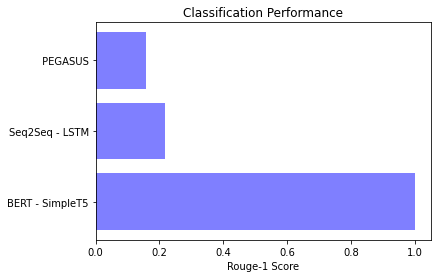

In [187]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, rouge1, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Rouge-1 Score')
plt2.title('Classification Performance')
plt2.show()

# Rouge-L

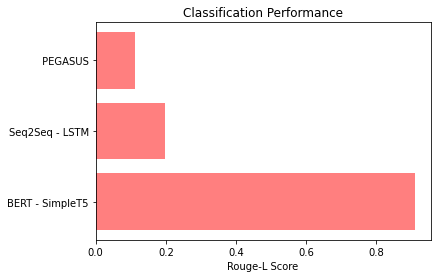

In [188]:
plt2.barh(y_pos, rougel, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Rouge-L Score')
plt2.title('Classification Performance')
plt2.show()